In [119]:
f = open('bioDBnet_db2db_221016050334_2063528135.txt', 'r')
lines = f.readlines()

ensembl_items = list()
for line in lines[1:]:
    items = line.split('\t')[1]
    if items == '-': continue
    items = items.split(';')
    for item in items:
        item = item.strip()
        try:
            if item != '': ensembl_items.append(int(item.replace('ENSP','')))
        except:
            pass

len(ensembl_items)

3721

In [122]:
import numpy as np
import random
random.seed(42)

vectors = list()
ids = list()
labels = list()

f = open("./p10q5.emb", 'r')
lines = f.readlines()

X = []
y = []

for line in lines[1:]:
    line = list(map(float, line.split()))
    key = int(line[0])
    value = np.array(line[1:])
    
    vectors.append(value)
    ids.append(key)
    labels.append(0)
    
    if key in ensembl_items:
        labels[-1] = 1
        X.append(value)
        y.append(1)
    else:
        if random.random() > 0.9:
            X.append(value)
            y.append(0)
vectors = np.array(vectors)
X = np.array(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from xgboost import XGBClassifier

xgmodel = XGBClassifier(n_estimators=2000, learning_rate=0.2, max_depth=5, random_state=42)
xgmodel.fit(X_train, y_train)

y_pred = xgmodel.predict_proba(X_test)
y_pred = y_pred[:,1]
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))

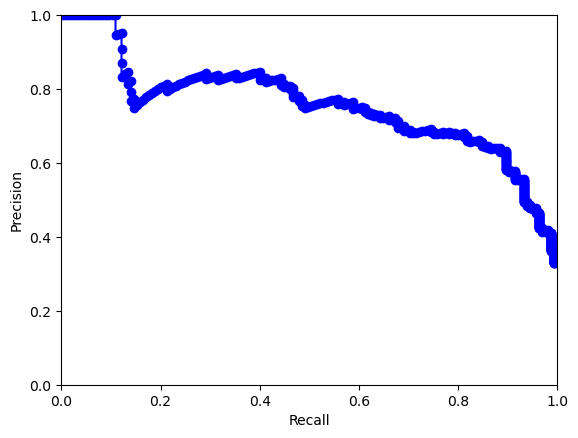

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# y_true is the true labels of the data
# y_scores is the predicted probabilities (or scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, 'b-',marker='o',markersize=6, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.show()

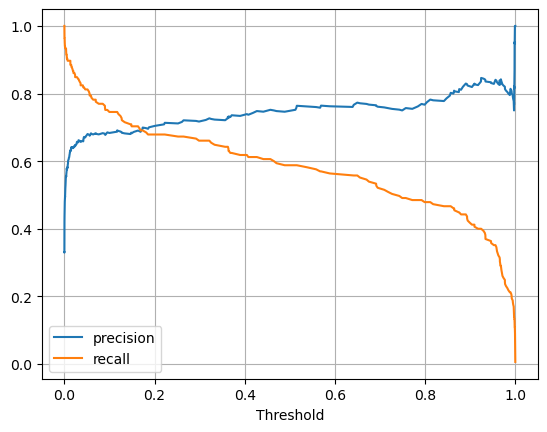

In [6]:
plt.plot(thresholds, precision[:len(thresholds)], label = 'precision')
plt.plot(thresholds, recall[:len(thresholds)], label = 'recall')
plt.grid()
plt.legend()
plt.xlabel('Threshold')
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.904042653708578

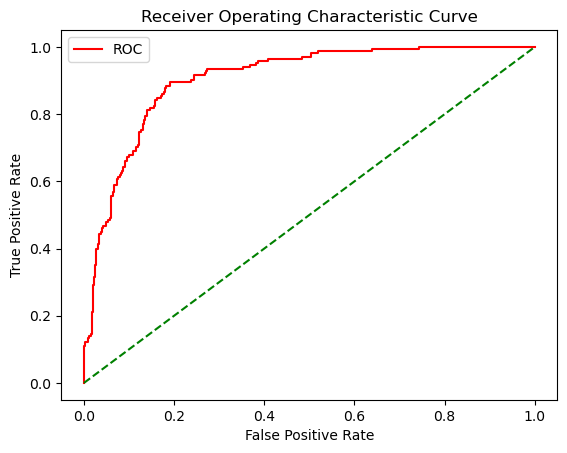

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

In [9]:
ensembl_items

[437634,
 363512,
 504612,
 416623,
 363868,
 363865,
 295683,
 394574,
 306124,
 378341,
 426268,
 386069,
 351800,
 421829,
 384806,
 421013,
 345502,
 423094,
 425910,
 492052,
 353152,
 424852,
 321739,
 425605,
 308485,
 424281,
 490821,
 425917,
 423555,
 428611,
 456339,
 379455,
 264914,
 389540,
 365048,
 445334,
 478332,
 442206,
 230882,
 483403,
 426739,
 482373,
 422333,
 483926,
 479846,
 478291,
 350335,
 295881,
 419402,
 373169,
 420662,
 508210,
 317518,
 480233,
 442604,
 507859,
 440521,
 490640,
 261201,
 508167,
 507226,
 507779,
 261200,
 506801,
 369581,
 369287,
 369293,
 256876,
 402024,
 461607,
 461268,
 486645,
 456930,
 170630,
 441667,
 455632,
 454725,
 455714,
 456248,
 456669,
 457131,
 379111,
 454684,
 223423,
 362802,
 494717,
 495728,
 483540,
 411606,
 437709,
 354612,
 506242,
 356438,
 504900,
 454130,
 440946,
 441818,
 446464,
 361965,
 449340,
 228740,
 449958,
 395051,
 358508,
 358506,
 400124,
 445306,
 295598,
 396236,
 411705,
 376066,
 

In [123]:
# Re-training XGB model using all the data and inference
xgmodel = XGBClassifier(n_estimators=2000, learning_rate=0.2, max_depth=5, random_state=42)
xgmodel.fit(X, y)

X = []
keys = []

for line in lines[1:]:
    line = list(map(float, line.split()))
    key = int(line[0])
    value = np.array(line[1:])
    keys.append(key)
    X.append(value)
X = np.array(X)
y_pred = xgmodel.predict_proba(X)[:,1]

In [124]:
X.shape

(19385, 128)

In [125]:
y_pred.shape

(19385,)

In [126]:
len(keys)

19385

In [130]:
import pandas as pd

threshold = 0.05 # 0.07

df = pd.DataFrame({
    'id':keys,
    'probability':y_pred,
})
df['id'] = df['id'].apply(lambda x: 'ENSP' + str(x).zfill(11))
df['label'] = (df['probability'] > threshold)*1
df

,id,probability,label
0,ENSP00000287652,0.000400,0
1,ENSP00000398596,0.000017,0
2,ENSP00000363500,0.079421,1
3,ENSP00000234195,0.000003,0
4,ENSP00000459615,0.000080,0
...,...,...,...
19380,ENSP00000476986,0.000011,0
19381,ENSP00000436580,0.000007,0
19382,ENSP00000391549,0.000025,0
19383,ENSP00000485336,0.000176,0


In [158]:
output = list(df['id'])
with open('ensembl.txt', 'w+') as lf:
    lf.write('\n'.join(output))

In [133]:
df2 = pd.read_excel('ensembl_to_uniprot.xlsx')
df = pd.merge(df, df2, left_on='id', right_on='From', how='left')
df = df.dropna()

E:\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [134]:
df2 = pd.read_csv('mapa_geneid_4_uniprot_crossref.txt', sep='\t')
df = pd.merge(df, df2, left_on='Entry', right_on='UniProtKB', how='left')
df = df.dropna()
# https://www.uniprot.org/id-mapping/uniprotkb/5a5f53f06efca9285947702d505501e5b3e184c5/overview

In [135]:
df

,id,probability,label,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,UniProtKB,GENEID
1,ENSP00000398596,0.000017,0,ENSP00000398596,Q96BW9,reviewed,TAM41_HUMAN,"Phosphatidate cytidylyltransferase, mitochondr...",TAMM41 C3orf31,Homo sapiens (Human),452.0,Q96BW9,132001.0
2,ENSP00000363500,0.079421,1,ENSP00000363500,Q9Y696,reviewed,CLIC4_HUMAN,Chloride intracellular channel protein 4 (Intr...,CLIC4,Homo sapiens (Human),253.0,Q9Y696,25932.0
4,ENSP00000459615,0.000080,0,ENSP00000459615,O75044,reviewed,SRGP2_HUMAN,SLIT-ROBO Rho GTPase-activating protein 2 (srG...,SRGAP2 ARHGAP34 FNBP2 KIAA0456 SRGAP2A,Homo sapiens (Human),1071.0,O75044,23380.0
5,ENSP00000370695,0.000005,0,ENSP00000370695,Q9NV70,reviewed,EXOC1_HUMAN,Exocyst complex component 1 (Exocyst complex c...,EXOC1 SEC3 SEC3L1 BM-012,Homo sapiens (Human),894.0,Q9NV70,55763.0
6,ENSP00000355141,0.000013,0,ENSP00000355141,Q9NZV5,reviewed,SELN_HUMAN,Selenoprotein N (SelN),SELENON SELN SEPN1,Homo sapiens (Human),590.0,Q9NZV5,57190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19070,ENSP00000252100,0.000084,0,ENSP00000252100,Q96DC7,reviewed,TMCO6_HUMAN,Transmembrane and coiled-coil domain-containin...,TMCO6 PRO1580,Homo sapiens (Human),493.0,Q96DC7,55374.0
19073,ENSP00000315265,0.000004,0,ENSP00000315265,Q8N1N2,reviewed,DYNAP_HUMAN,Dynactin-associated protein (Full),DYNAP C18orf26,Homo sapiens (Human),210.0,Q8N1N2,284254.0
19076,ENSP00000391404,0.000007,0,ENSP00000391404,C9J302,reviewed,CD051_HUMAN,Uncharacterized protein C4orf51,C4orf51,Homo sapiens (Human),202.0,C9J302,646603.0
19083,ENSP00000320520,0.000020,0,ENSP00000320520,Q2VPJ9,reviewed,LR75B_HUMAN,Leucine-rich repeat-containing protein 75B (Le...,LRRC75B C22orf36 FAM211B,Homo sapiens (Human),315.0,Q2VPJ9,388886.0


In [136]:
# number of potential targets
sum(df['label'])

2957

In [18]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)

conn = sqlite3.connect("disgenet_2020.db", isolation_level=None)
c = conn.cursor()

gd = pd.read_sql("select * from geneDiseaseNetwork;", conn)
gd.to_csv("gene_disease_network.csv")

2.6.0
3.39.3


In [ ]:
gd = pd.read_csv("gene_disease_network.csv")
gd = gd[['NID','diseaseNID','geneNID']]
gd

In [138]:
import sqlite3
da = pd.read_sql("select * from diseaseAttributes;", conn)
da

,diseaseNID,diseaseId,diseaseName,type
0,1,C0000727,"Abdomen, Acute",phenotype
1,2,C0000729,Abdominal Cramps,phenotype
2,3,C0000731,Abdomen distended,phenotype
3,4,C0000734,Abdominal mass,phenotype
4,5,C0000735,Abdominal Neoplasms,group
...,...,...,...,...
30288,30289,C4755314,Autosomal recessive cutis laxa type 2B,disease
30289,30290,C4757950,Isolated ATP synthase deficiency,disease
30290,30291,C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease
30291,30292,C4759295,Non-metastatic prostate cancer,disease


In [157]:
ga = pd.read_sql("select * from geneAttributes;", conn)
ga

,geneNID,geneId,geneName,geneDescription,pLI,DSI,DPI
0,1,1,A1BG,alpha-1-B glycoprotein,4.991700e-09,0.700,0.538
1,2,2,A2M,alpha-2-macroglobulin,4.522900e-11,0.529,0.769
2,3,3,A2MP1,alpha-2-macroglobulin pseudogene 1,NaN,NaN,NaN
3,4,9,NAT1,N-acetyltransferase 1,1.929400e-14,0.536,0.846
4,5,10,NAT2,N-acetyltransferase 2,3.274400e-06,0.451,0.885
...,...,...,...,...,...,...,...
26132,26133,115482722,H3P33,H3 histone pseudogene 33,NaN,0.736,0.346
26133,26134,115482723,H3P40,H3 histone pseudogene 40,NaN,0.506,0.846
26134,26135,115561815,LNC-LBCS,"lncRNA bladder and prostate cancer suppressor,...",NaN,0.890,0.077
26135,26136,115804232,CEROX1,cytoplasmic endogenous regulator of oxidative ...,NaN,NaN,NaN


In [160]:
df_nid = pd.merge(df, ga, left_on='GENEID', right_on='geneId', how='left')
df_nid

,id,probability,label,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,UniProtKB,GENEID,geneNID,geneId,geneName,geneDescription,pLI,DSI,DPI
0,ENSP00000398596,0.000017,0,ENSP00000398596,Q96BW9,reviewed,TAM41_HUMAN,"Phosphatidate cytidylyltransferase, mitochondr...",TAMM41 C3orf31,Homo sapiens (Human),452.0,Q96BW9,132001.0,15232,132001,TAMM41,TAM41 mitochondrial translocator assembly and ...,1.099600e-06,0.890,0.077
1,ENSP00000363500,0.079421,1,ENSP00000363500,Q9Y696,reviewed,CLIC4_HUMAN,Chloride intracellular channel protein 4 (Intr...,CLIC4,Homo sapiens (Human),253.0,Q9Y696,25932.0,9005,25932,CLIC4,chloride intracellular channel 4,1.086600e-03,0.628,0.423
2,ENSP00000459615,0.000080,0,ENSP00000459615,O75044,reviewed,SRGP2_HUMAN,SLIT-ROBO Rho GTPase-activating protein 2 (srG...,SRGAP2 ARHGAP34 FNBP2 KIAA0456 SRGAP2A,Homo sapiens (Human),1071.0,O75044,23380.0,8623,23380,SRGAP2,SLIT-ROBO Rho GTPase activating protein 2,9.767900e-01,0.729,0.462
3,ENSP00000370695,0.000005,0,ENSP00000370695,Q9NV70,reviewed,EXOC1_HUMAN,Exocyst complex component 1 (Exocyst complex c...,EXOC1 SEC3 SEC3L1 BM-012,Homo sapiens (Human),894.0,Q9NV70,55763.0,11345,55763,EXOC1,exocyst complex component 1,6.901200e-04,0.792,0.154
4,ENSP00000355141,0.000013,0,ENSP00000355141,Q9NZV5,reviewed,SELN_HUMAN,Selenoprotein N (SelN),SELENON SELN SEPN1,Homo sapiens (Human),590.0,Q9NZV5,57190.0,11801,57190,SELENON,selenoprotein N,9.786300e-10,0.575,0.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,ENSP00000252100,0.000084,0,ENSP00000252100,Q96DC7,reviewed,TMCO6_HUMAN,Transmembrane and coiled-coil domain-containin...,TMCO6 PRO1580,Homo sapiens (Human),493.0,Q96DC7,55374.0,11145,55374,TMCO6,transmembrane and coiled-coil domains 6,1.272400e-09,NaN,NaN
16462,ENSP00000315265,0.000004,0,ENSP00000315265,Q8N1N2,reviewed,DYNAP_HUMAN,Dynactin-associated protein (Full),DYNAP C18orf26,Homo sapiens (Human),210.0,Q8N1N2,284254.0,17088,284254,DYNAP,dynactin associated protein,2.580600e-03,NaN,NaN
16463,ENSP00000391404,0.000007,0,ENSP00000391404,C9J302,reviewed,CD051_HUMAN,Uncharacterized protein C4orf51,C4orf51,Homo sapiens (Human),202.0,C9J302,646603.0,19179,646603,C4orf51,chromosome 4 open reading frame 51,6.031800e-06,NaN,NaN
16464,ENSP00000320520,0.000020,0,ENSP00000320520,Q2VPJ9,reviewed,LR75B_HUMAN,Leucine-rich repeat-containing protein 75B (Le...,LRRC75B C22orf36 FAM211B,Homo sapiens (Human),315.0,Q2VPJ9,388886.0,17988,388886,LRRC75B,leucine rich repeat containing 75B,9.024100e-13,0.931,0.077


In [161]:
dfm = pd.merge(df_nid, gd, on='geneNID', how='right')
dfm = dfm.dropna()
dfm = pd.merge(dfm, da, on='diseaseNID', how='left')
dfm.to_csv('targets_inference_complete.csv')

In [162]:
dfm

,id,probability,label,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,...,geneName,geneDescription,pLI,DSI,DPI,NID,diseaseNID,diseaseId,diseaseName,type
0,ENSP00000221992,0.875194,1.0,ENSP00000221992,P06731,reviewed,CEAM5_HUMAN,Carcinoembryonic antigen-related cell adhesion...,CEACAM5 CEA,Homo sapiens (Human),...,CEACAM5,CEA cell adhesion molecule 5,4.162500e-10,0.420,0.846,1130681,2107,C0027651,Neoplasms,group
1,ENSP00000384849,0.620930,1.0,ENSP00000384849,P38936,reviewed,CDN1A_HUMAN,Cyclin-dependent kinase inhibitor 1 (CDK-inter...,CDKN1A CAP20 CDKN1 CIP1 MDA6 PIC1 SDI1 WAF1,Homo sapiens (Human),...,CDKN1A,cyclin dependent kinase inhibitor 1A,1.857500e-03,0.403,0.769,261998,431,C0006826,Malignant Neoplasms,group
2,ENSP00000384849,0.620930,1.0,ENSP00000384849,P38936,reviewed,CDN1A_HUMAN,Cyclin-dependent kinase inhibitor 1 (CDK-inter...,CDKN1A CAP20 CDKN1 CIP1 MDA6 PIC1 SDI1 WAF1,Homo sapiens (Human),...,CDKN1A,cyclin dependent kinase inhibitor 1A,1.857500e-03,0.403,0.769,369637,450,C0007103,Malignant neoplasm of endometrium,disease
3,ENSP00000384849,0.620930,1.0,ENSP00000384849,P38936,reviewed,CDN1A_HUMAN,Cyclin-dependent kinase inhibitor 1 (CDK-inter...,CDKN1A CAP20 CDKN1 CIP1 MDA6 PIC1 SDI1 WAF1,Homo sapiens (Human),...,CDKN1A,cyclin dependent kinase inhibitor 1A,1.857500e-03,0.403,0.769,2128526,10033,C0476089,Endometrial Carcinoma,disease
4,ENSP00000442954,0.067088,1.0,ENSP00000442954,O95996,reviewed,APCL_HUMAN,Adenomatous polyposis coli protein 2 (Adenomat...,APC2 APCL,Homo sapiens (Human),...,APC2,APC regulator of WNT signaling pathway 2,9.999400e-01,0.582,0.654,262799,431,C0006826,Malignant Neoplasms,group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838574,ENSP00000353734,0.019622,0.0,ENSP00000353734,Q9UM63,reviewed,PLAL1_HUMAN,Zinc finger protein PLAGL1 (Lost on transforma...,PLAGL1 LOT1 ZAC,Homo sapiens (Human),...,PLAGL1,PLAG1 like zinc finger 1,9.764000e-01,0.566,0.769,3261055,30220,C4749378,Paternal uniparental disomy of chromosome 6,disease
2838575,ENSP00000339004,0.004671,0.0,ENSP00000339004,P55316,reviewed,FOXG1_HUMAN,Forkhead box protein G1 (Brain factor 1) (BF-1...,FOXG1 FKH2 FKHL1 FKHL2 FKHL3 FKHL4 FOXG1A FOXG...,Homo sapiens (Human),...,FOXG1,forkhead box G1,9.435500e-01,0.522,0.692,3261082,30235,C4749855,14q11.2 microduplication syndrome,disease
2838576,ENSP00000369325,0.001126,0.0,ENSP00000369325,O76039,reviewed,CDKL5_HUMAN,Cyclin-dependent kinase-like 5 (EC 2.7.11.22) ...,CDKL5 STK9,Homo sapiens (Human),...,CDKL5,cyclin dependent kinase like 5,9.993200e-01,0.522,0.692,3261111,30244,C4750718,Cyclin-dependent kinase-like 5 deficiency,disease
2838577,ENSP00000315417,0.000014,0.0,ENSP00000315417,Q15699,reviewed,ALX1_HUMAN,ALX homeobox protein 1 (Cartilage homeoprotein...,ALX1 CART1,Homo sapiens (Human),...,ALX1,ALX homeobox 1,1.761800e-01,0.636,0.462,3261162,30255,C4751077,"Frontonasal dysplasia, severe microphthalmia, ...",disease


In [163]:
set(dfm[dfm['label']==1]['diseaseName'])

{'Polymicrogyria',
 'Semilobar Holoprosencephaly',
 'Hereditary C1 esterase inhibitor deficiency - dysfunctional factor',
 'Apnea, Postanesthetic',
 'Axillary vein thrombosis',
 'Central Nervous System Sensitization',
 'Vitamin K Deficiency Bleeding',
 'HYPERALDOSTERONISM, FAMILIAL, TYPE IV',
 'Grade II Meningioma',
 'Plexiform ameloblastoma',
 'Moderate sensorineural hearing impairment',
 'Small Intestinal Neuroendocrine Neoplasm',
 'Finding of Mean Corpuscular Hemoglobin',
 'Bone Demineralization, Pathologic',
 'Medial flaring of the eyebrow',
 'Pallor of optic disc',
 'Tenosynovitis of hand',
 'EMG: myopathic abnormalities',
 'Taste Disorder, Primary, Salt',
 'Piebaldism',
 'SHORT QT SYNDROME 2 (disorder)',
 'Stenosis',
 'Carcinoma, Ehrlich Tumor',
 'Calcineurin inhibitor induced pain syndrome',
 'Renal carcinoma',
 'Gastrointestinal Stromal Sarcoma',
 'Primary Amebic Meningoencephalitis',
 'Decreased activity of the pyruvate dehydrogenase complex',
 'Generalized hyperkeratosis',
 '

In [170]:
diseaseName = 'Bipolar Disorder'

In [175]:
output = dfm[dfm['label']==1][dfm['diseaseName']==diseaseName].sort_values('probability', ascending=False)
output = output[['id', 'probability', 'label', 'Entry', 'Protein names', 'UniProtKB', 'geneName', 'pLI', 'DSI', 'DPI']]
output = output.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
output

C:\Users\ragnarokv\AppData\Local\Temp\ipykernel_44028\2211617971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  output = dfm[dfm['label']==1][dfm['diseaseName']==diseaseName].sort_values('probability', ascending=False)


,id,probability,label,Entry,Protein names,UniProtKB,geneName,pLI,DSI,DPI
0,ENSP00000354511,0.999999,1.0,P21964,Catechol O-methyltransferase (EC 2.1.1.6),P21964,COMT,1.137700e-06,0.400,0.923
1,ENSP00000250018,0.999998,1.0,P17752,Tryptophan 5-hydroxylase 1 (EC 1.14.16.4) (Try...,P17752,TPH1,3.187200e-07,0.553,0.731
2,ENSP00000276198,0.999996,1.0,P28335,5-hydroxytryptamine receptor 2C (5-HT-2C) (5-H...,P28335,HTR2C,3.702300e-02,0.555,0.692
3,ENSP00000336528,0.999995,1.0,O75469,Nuclear receptor subfamily 1 group I member 2 ...,O75469,NR1I2,7.266800e-09,0.418,0.846
4,ENSP00000295589,0.999995,1.0,P32238,Cholecystokinin receptor type A (CCK-A recepto...,P32238,CCKAR,4.032900e-03,0.615,0.500
...,...,...,...,...,...,...,...,...,...,...
476,ENSP00000293825,0.055215,1.0,O43508,Tumor necrosis factor ligand superfamily membe...,O43508,TNFSF12-TNFSF13,7.699700e-01,0.579,0.615
477,ENSP00000293825,0.055215,1.0,O43508,Tumor necrosis factor ligand superfamily membe...,O43508,TNFSF12,7.699700e-01,0.556,0.769
478,ENSP00000254322,0.055147,1.0,P25685,DnaJ homolog subfamily B member 1 (DnaJ protei...,P25685,DNAJB1,3.943700e-02,0.597,0.692
479,ENSP00000385142,0.053257,1.0,Q9ULB1,Neurexin-1 (Neurexin I-alpha) (Neurexin-1-alpha),Q9ULB1,NRXN1,9.996400e-01,0.581,0.692


In [154]:
dfm[dfm['diseaseName']==diseaseName].sort_values('probability', ascending=False)

,id,probability,label,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,UniProtKB,GENEID,NID,diseaseNID,geneNID,diseaseId,diseaseName,type
1465535,ENSP00000369050,0.999787,1.0,ENSP00000369050,P04798,reviewed,CP1A1_HUMAN,Cytochrome P450 1A1 (CYPIA1) (EC 1.14.14.1) (C...,CYP1A1,Homo sapiens (Human),512.0,P04798,1543.0,1335773,2238,1543,C0029400,Osteitis,disease
1192066,ENSP00000369050,0.999787,1.0,ENSP00000369050,P04798,reviewed,CP1A1_HUMAN,Cytochrome P450 1A1 (CYPIA1) (EC 1.14.14.1) (C...,CYP1A1,Homo sapiens (Human),512.0,P04798,1543.0,1335774,2238,1543,C0029400,Osteitis,disease
1291317,ENSP00000369293,0.999643,1.0,ENSP00000369293,P01589,reviewed,IL2RA_HUMAN,Interleukin-2 receptor subunit alpha (IL-2 rec...,IL2RA,Homo sapiens (Human),272.0,P01589,3559.0,1335801,2238,3559,C0029400,Osteitis,disease
1124601,ENSP00000369293,0.999643,1.0,ENSP00000369293,P01589,reviewed,IL2RA_HUMAN,Interleukin-2 receptor subunit alpha (IL-2 rec...,IL2RA,Homo sapiens (Human),272.0,P01589,3559.0,1335802,2238,3559,C0029400,Osteitis,disease
1592415,ENSP00000296029,0.997476,1.0,ENSP00000296029,P02776,reviewed,PLF4_HUMAN,Platelet factor 4 (PF-4) (C-X-C motif chemokin...,PF4 CXCL4 SCYB4,Homo sapiens (Human),101.0,P02776,5196.0,1335815,2238,5196,C0029400,Osteitis,disease
610349,ENSP00000350928,0.993541,1.0,ENSP00000350928,Q99259,reviewed,DCE1_HUMAN,Glutamate decarboxylase 1 (EC 4.1.1.15) (67 kD...,GAD1 GAD GAD67,Homo sapiens (Human),594.0,Q99259,2571.0,1335786,2238,2571,C0029400,Osteitis,disease
677920,ENSP00000350928,0.993541,1.0,ENSP00000350928,Q99259,reviewed,DCE1_HUMAN,Glutamate decarboxylase 1 (EC 4.1.1.15) (67 kD...,GAD1 GAD GAD67,Homo sapiens (Human),594.0,Q99259,2571.0,1335784,2238,2571,C0029400,Osteitis,disease
741592,ENSP00000350928,0.993541,1.0,ENSP00000350928,Q99259,reviewed,DCE1_HUMAN,Glutamate decarboxylase 1 (EC 4.1.1.15) (67 kD...,GAD1 GAD GAD67,Homo sapiens (Human),594.0,Q99259,2571.0,1335787,2238,2571,C0029400,Osteitis,disease
1295493,ENSP00000350928,0.993541,1.0,ENSP00000350928,Q99259,reviewed,DCE1_HUMAN,Glutamate decarboxylase 1 (EC 4.1.1.15) (67 kD...,GAD1 GAD GAD67,Homo sapiens (Human),594.0,Q99259,2571.0,1335785,2238,2571,C0029400,Osteitis,disease
1116417,ENSP00000350928,0.993541,1.0,ENSP00000350928,Q99259,reviewed,DCE1_HUMAN,Glutamate decarboxylase 1 (EC 4.1.1.15) (67 kD...,GAD1 GAD GAD67,Homo sapiens (Human),594.0,Q99259,2571.0,1335783,2238,2571,C0029400,Osteitis,disease
